#AI
##Machine learning: Decision Tree classifier for Diabetes dignosis



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 import pandas as pd

df=pd.read_csv("/content/drive/My Drive/IA/diabetes.csv") #df es mi tabla de datos o "data frame"
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df=pd.get_dummies(df,columns=["gender"], drop_first=True)

In [ ]:
df=pd.get_dummies(df,columns=["smoking_history"])
df = df.drop("gender_Other", axis = 1)

In [ ]:
df.head(10)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
5,20.0,0,0,27.32,6.6,85,0,False,False,False,False,False,True,False
6,44.0,0,0,19.31,6.5,200,1,False,False,False,False,False,True,False
7,79.0,0,0,23.86,5.7,85,0,False,True,False,False,False,False,False
8,42.0,0,0,33.64,4.8,145,0,True,False,False,False,False,True,False
9,32.0,0,0,27.32,5.0,100,0,False,False,False,False,False,True,False


In [ ]:
df.info() #Ens dona informació sobre el tipus de variables contingudes al dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Male                  100000 non-null  bool   
 8   smoking_history_No Info      100000 non-null  bool   
 9   smoking_history_current      100000 non-null  bool   
 10  smoking_history_ever         100000 non-null  bool   
 11  smoking_history_former       100000 non-null  bool   
 12  smoking_history_never        100000 non-null  bool   
 13  

In [ ]:
df.describe() #Estadistica bàsica del conjunt de dades

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: >

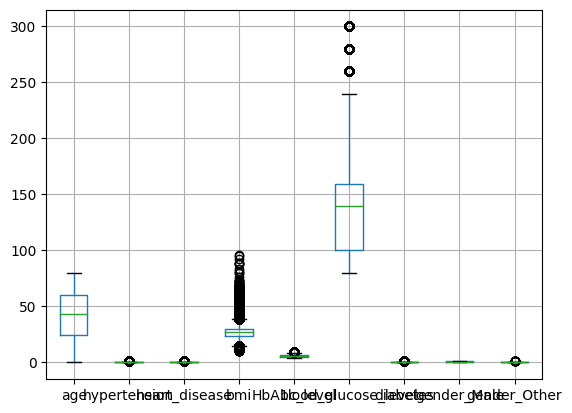

In [ ]:
df.boxplot() #Boxplot (diagrama de caixes)

<Axes: xlabel='gender_Male', ylabel='count'>

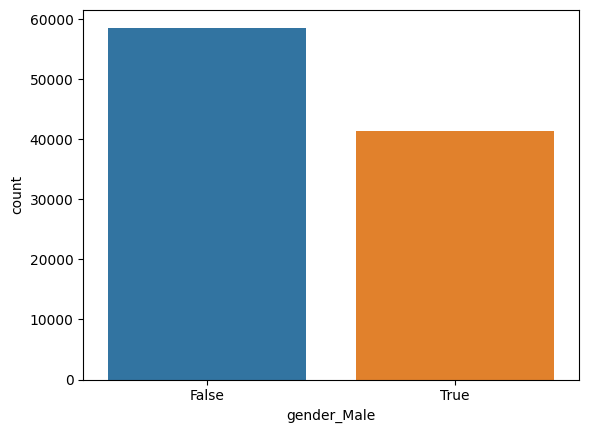

In [ ]:
import seaborn as sns
sns.countplot(x=df['gender_Male'])

In [ ]:
df[df["diabetes"]==1].gender_Male.value_counts()

0    4461
1    4039
Name: gender_Male, dtype: int64

<Axes: xlabel='gender_Male', ylabel='count'>

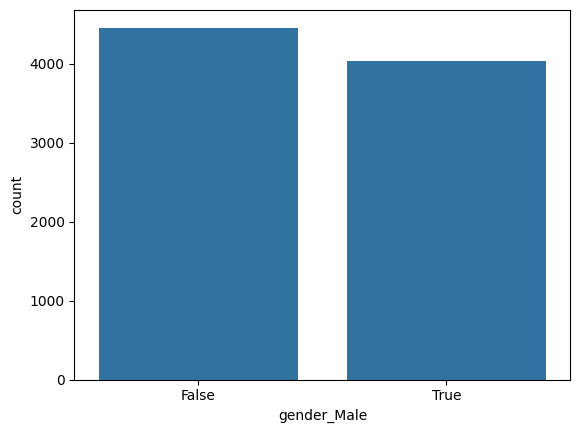

In [ ]:
sns.countplot(x=df[df["diabetes"]==1].gender_Male)

NameError: ignored

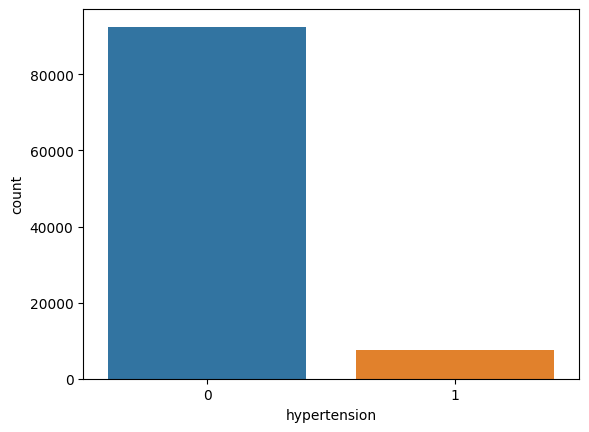

In [ ]:
sns.countplot(x=df['hypertension'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Hypertension')

NameError: name 'plt' is not defined

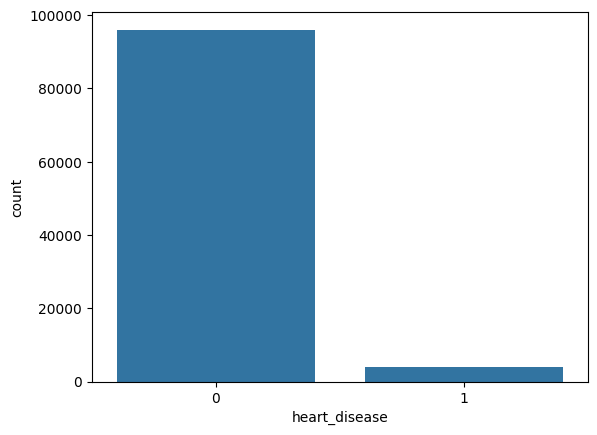

In [ ]:
sns.countplot(x=df['heart_disease'])
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.xlabel('Heart Disease')


NameError: name 'plt' is not defined

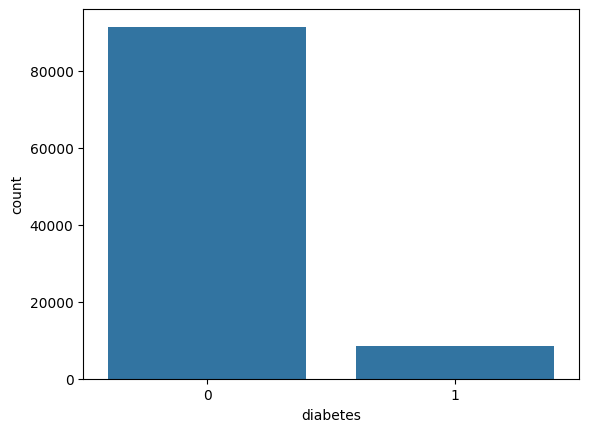

In [ ]:
sns.countplot(x=df['diabetes'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')




sns.boxplot(x=df['diabetes'], y=df['age'])
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Diabetes')



In [ ]:


sns.boxplot(x=df['hypertension'], y=df['age'], palette='viridis')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Hypertension')



NameError: name 'sns' is not defined

<Axes: >

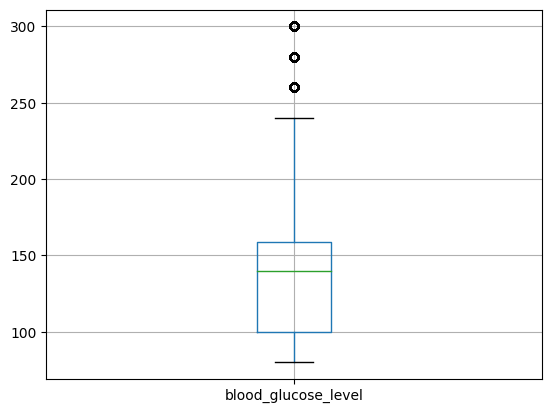

In [ ]:
df.boxplot(column="blood_glucose_level")

In [ ]:
#Instalamos la libreria para generar un informe: Pandas profiling
!pip install http://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 24.7 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=80c7e4ab549944ce6d9bdd8db9f3dd32987f2c582c4b4b0798dbd4322d1a26b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-95a3bfnh/wheels/7b/21/52/a48b71cbe07e9d4c5516eea338d3e384d9fd301d75490b7a26
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=3bc74e9731e1e574b57533d7a5d2c95d28198f39d98dd9880787a5186b6df7f3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098

In [ ]:
from pandas_profiling import ProfileReport
report= ProfileReport(df)
report

<ipython-input-25-4e692e629943>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

#Machine Learning
##Arbol de decisión

In [ ]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [ ]:
#Identifico Y y X:
Y = df.diabetes	 #Solo la columna "diabetes"
X = df.drop("diabetes", axis=1) #Todas las columnas menos "diabetes	" #Axis=1 es que borro columna
#Dividimos conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
# Entrenamos un Arbol de Decision
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Predicciones
predictions = model.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


In [ ]:
print(Y_test)

75721    0
80184    0
19864    0
76699    0
92991    1
        ..
42648    1
86306    0
45466    0
63724    0
34122    0
Name: diabetes, Length: 30000, dtype: int64


In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27453
           1       1.00      0.67      0.80      2547

    accuracy                           0.97     30000
   macro avg       0.98      0.83      0.89     30000
weighted avg       0.97      0.97      0.97     30000



Para ver como de balanceado esta el conjunto

In [ ]:
df.diabetes.value_counts() #per a tot el dataset, permet comptabilitzar els pacients de cada classe

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')

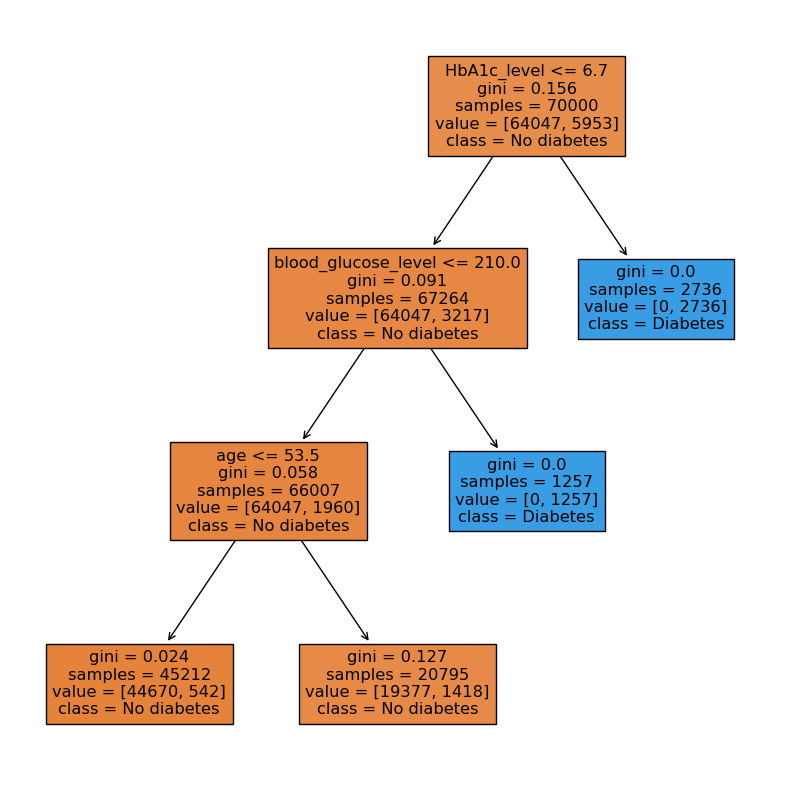

In [ ]:
# Dibuixem l'arbre
from matplotlib import pyplot as plt
from sklearn import tree
fig=plt.figure(figsize=(10,10))
_=tree.plot_tree(model,feature_names=['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'], class_names=["No diabetes","Diabetes"], filled=True)

In [ ]:
model.predict([[47.0,1,0,26.33,6.6,300,0,0,1,0,0,0,0]]) #Tengo el modelo entrenado y es para predecir a un paciente determinado
#Habria que actualizar esta linea con tantos valores como columnas x

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])